# Load Data :

In [1]:
import pandas as pd
import pickle
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

C:\Users\msi\anaconda3\envs\tf-gpu\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\msi\anaconda3\envs\tf-gpu\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
C:\Users\msi\anaconda3\envs\tf-gpu\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
import numpy as np
import cv2
import PIL.Image as Image

In [3]:
def read_pkl_to_dataframe(file_path):
    with open(file_path, 'rb') as f:
        data = pickle.load(f)
    return pd.DataFrame(data)

In [4]:
def load_rdt_data(file_path):
    with open(file_path, 'rb') as f:
        data = pickle.load(f)
    return data

In [5]:
def load_rdt_dataframes(id):
    rdt_dataframes = [load_rdt_data(f'C:/Users/msi/Downloads/Data_EAT_RADAR/Data/RDT_{i}.pkl') for i in range(id,id+1)]
    return rdt_dataframes

In [6]:
rdt_dataframes_0=load_rdt_dataframes(0)

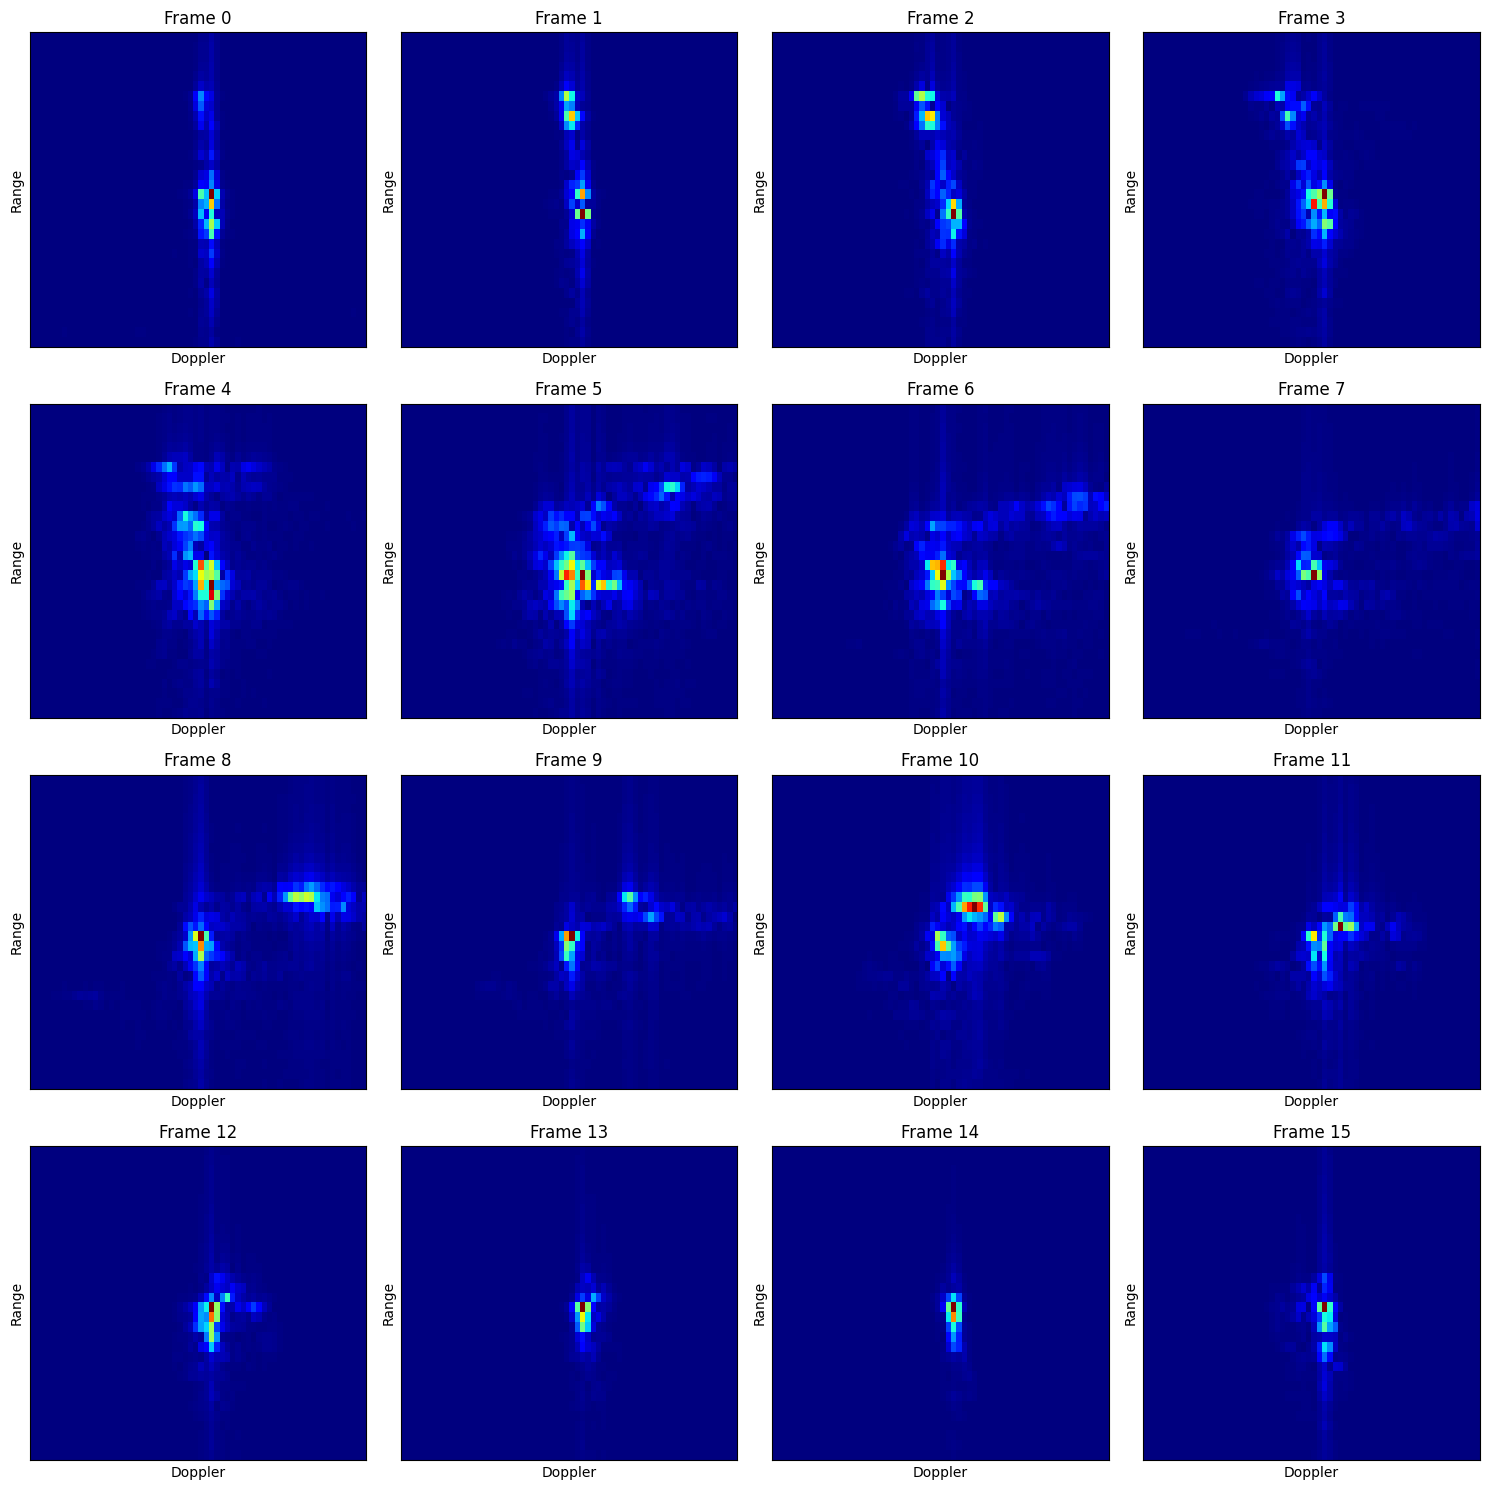

In [7]:
# Plotting the first 9 frames of RDT data
fig, axes = plt.subplots(4, 4, figsize=(15, 15))

for i, ax in enumerate(axes.flatten()):
    ax.imshow(rdt_dataframes_0[0][i, :, :], cmap='jet', aspect='auto')
    ax.set_title(f'Frame {i}')
    ax.set_xlabel('Doppler')
    ax.set_ylabel('Range')
    ax.set_xticks([])
    ax.set_yticks([])

plt.tight_layout()
plt.show()

In [8]:
with open('C:/Users/msi/Downloads/Data_EAT_RADAR/Data/Labels/Labels/data_Y_70.pkl', 'rb') as f:
    data = pickle.load(f)

# Create a DataFrame with meal ID index
labels_df = pd.DataFrame({'Labels': data}, index=range(70))

In [9]:
labels_df

Labels
0   [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
1   [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
2   [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
3   [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
4   [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
..                                                ...
65  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
66  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
67  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
68  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
69  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...

[70 rows x 1 columns]

In [10]:
id_list_data = {}
for i in range(7):
    folder_name = str(i)
    train_ids = np.load(f'C:/Users/msi/Downloads/Data_EAT_RADAR/Data/7-fold id_list/7-fold id_list/{folder_name}/train.npy')
    test_ids = np.load(f'C:/Users/msi/Downloads/Data_EAT_RADAR/Data/7-fold id_list/7-fold id_list/{folder_name}/test.npy')
    valid_ids = np.load(f'C:/Users/msi/Downloads/Data_EAT_RADAR/Data/7-fold id_list/7-fold id_list/{folder_name}/valid.npy')
    
    id_list_data[folder_name] = {
        'train_ids': train_ids,
        'test_ids': test_ids,
        'valid_ids': valid_ids
    }

# Splitting and preproceesing of data :

In [11]:
train_ids

array([35, 32, 21, 64, 46, 24, 60, 44, 41, 61, 38, 39, 10, 30,  8, 65, 67,
       59, 55, 52, 58, 18,  7,  2, 25, 56, 31, 19, 16, 20, 34, 49, 45,  3,
       26, 29, 53, 66, 23,  9, 12, 57, 47, 50, 37,  0, 40, 43,  6, 13])

In [12]:
l=[]
H=[]
for j in range(70) :
    rdt_dataframes=load_rdt_dataframes(j)
    for i in rdt_dataframes:
        s=i.shape[0]
        num_frames_to_add = 1000 - (s % 1000)
        null_frames = np.zeros((num_frames_to_add,) + (32,64))
        concatenated_array = np.concatenate(rdt_dataframes, axis=0)
        extended_array = np.concatenate([concatenated_array, null_frames], axis=0)
        X = extended_array.reshape((-1, 32, 64, 1000, 1))
        H.append(num_frames_to_add)
        l.append(X)


In [13]:
l[0].shape

(24, 32, 64, 1000, 1)

In [14]:
labels=[]
num_classes=3
for i in range(70):
    label_for_id = list(labels_df.iloc[i, 0])
    label_for_id = label_for_id + [0] * H[i]
    y = np.array(label_for_id)
    y_reshaped = np.array(y).reshape(-1, 1000)
    num_classes = 3  # Assuming you have 3 classes
    y_one_hot = np.eye(num_classes)[y_reshaped]
    y_final = y_one_hot.reshape(-1, 1000, num_classes)
    labels.append(y_final)

In [15]:
l_train=[l[i] for i in train_ids]
labels_train=[labels[i] for i in train_ids]

In [16]:
l_test=[l[i] for i in test_ids]
labels_test=[labels[i] for i in test_ids]

In [17]:
l_valid=[l[i] for i in valid_ids]
labels_valid=[labels[i] for i in valid_ids]

# Model Bulding :

In [18]:
import tensorflow as tf
from keras.layers import Input,Dropout,Reshape,Permute,Conv1D,Conv3D, Permute,Flatten,Dense,Conv2D
from keras.models import Model,Sequential

In [41]:
model = Sequential()


def create_model(input_shape):
    # Input layer
    inputs = Input(shape=input_shape)

    # Shape variant layers
    x = Conv3D(filters=32, kernel_size=(3, 3, 3), strides=(1, 2, 1), padding='same', activation='relu')(inputs)
    x = Conv3D(filters=32, kernel_size=(3, 3, 3), strides=(2, 2, 1), padding='same', activation='relu')(x)
    x = Conv3D(filters=32, kernel_size=(3, 3, 3), strides=(2, 2, 1), padding='same', activation='relu')(x)
    x = Conv3D(filters=32, kernel_size=(3, 3, 3), strides=(2, 2, 1), padding='same', activation='relu')(x)

    # Shape invariant layers
    x = Conv3D(filters=32, kernel_size=(3, 3, 3), strides=(1, 1, 1), padding='same', activation='relu')(x)
    x = Conv3D(filters=32, kernel_size=(3, 3, 3), strides=(1, 1, 1), padding='same', activation='relu')(x)
    x = Conv3D(filters=32, kernel_size=(3, 3, 3), strides=(1, 1, 1), padding='same', activation='relu')(x)
    x = Conv3D(filters=32, kernel_size=(3, 3, 3), strides=(1, 1, 1), padding='same', activation='relu')(x)
    x = Conv3D(filters=32, kernel_size=(3, 3, 3), strides=(1, 1, 1), padding='same', activation='relu')(x)

    # Flatten layer
    # Flatten layer
    x = Flatten()(x)
    
    # Reshape layer
    x = Reshape((512, 1000))(x)
    # Additional layers
    x = Permute((2, 1))(x)

    x = Conv1D(filters=3, kernel_size=1)(x)

    # Assuming you have a custom SelfAttention layer
   # x = SelfAttention(4,32)(x)

    # Additional layers
    x = tf.keras.layers.ReLU()(x)
    x = tf.keras.layers.Dropout(0.3)(x)
    outputs = Dense(3, activation='softmax')(x)  # Assuming 3 output classes

    # Define model
    model = Model(inputs=inputs, outputs=outputs)

    return model

# Input shape
input_shape = (32, 64, 1000, 1)  # Assuming range x doppler x time x channels

# Create the model
model = create_model(input_shape)

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print model summary
model.summary()


Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 32, 64, 1000, 1)  0         
                             ]                                   
                                                                 
 conv3d_18 (Conv3D)          (None, 32, 32, 1000, 32)  896       
                                                                 
 conv3d_19 (Conv3D)          (None, 16, 16, 1000, 32)  27680     
                                                                 
 conv3d_20 (Conv3D)          (None, 8, 8, 1000, 32)    27680     
                                                                 
 conv3d_21 (Conv3D)          (None, 4, 4, 1000, 32)    27680     
                                                                 
 conv3d_22 (Conv3D)          (None, 4, 4, 1000, 32)    27680     
                                                           

# Train the model :

In [24]:
def data_generator(X_list, y_list, batch_size):
    num_samples = len(X_list)
    while True :
        for i in range(num_samples):
            X = X_list[i]
            y = y_list[i]
            num_batches = X.shape[0] // batch_size
            for j in range(num_batches):
                start_idx = j * batch_size
                end_idx = start_idx + batch_size
                yield X[start_idx:end_idx], y[start_idx:end_idx]
        
batch_size = 1
train_generator = data_generator(l_train, labels_train, batch_size)
val_generator = data_generator(l_valid, labels_valid, batch_size)

In [25]:
total_elements_train = 0
for x in l_train:
    total_elements_train += x.shape[0]  

In [26]:
total_elements_test = 0
for x in l_test:
    total_elements_test += x.shape[0]

In [27]:
total_elements_valid = 0
for x in l_valid:
    total_elements_valid += x.shape[0]

In [28]:
total_elements_train

1308

In [29]:
total_elements_test

234

In [30]:
total_elements_valid

225

In [42]:
epochs = 2
model.fit(train_generator, steps_per_epoch=total_elements_train,epochs=epochs,validation_data=val_generator, validation_steps= total_elements_valid)

Epoch 1/2
1308/1308 [==============================] - 1072s 818ms/step - loss: 0.7997 - accuracy: 0.7600 - val_loss: 0.7502 - val_accuracy: 0.7255
Epoch 2/2
1308/1308 [==============================] - 1079s 825ms/step - loss: 0.7003 - accuracy: 0.7648 - val_loss: 0.7513 - val_accuracy: 0.7255


# Evaluate the Model :

In [43]:
test_generator = data_generator(l_test, labels_test, batch_size)

In [44]:
model.evaluate(test_generator, steps=total_elements_test)

234/234 [==============================] - 31s 130ms/step - loss: 0.6523 - accuracy: 0.7832


[0.652345597743988, 0.7831666469573975]

# Save the Model :

In [45]:
save_path = 'C:/Users/msi/Downloads/Data_EAT_RADAR/my_model.h5'
model.save(save_path)